In [23]:
import os
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
from matplotlib import colors
from glob import glob
import json

In [83]:
cmap = colors.ListedColormap(
    ['#FFFFFF','#000000', '#0074D9','#FF4136','#2ECC40','#FFDC00',
     '#AAAAAA', '#F012BE', '#FF851B', '#7FDBFF', '#870C25'])
norm = colors.Normalize(vmin=-1, vmax=9)

def get_data(task_filename):
    with open(task_filename, 'r') as f:
        task = json.load(f)
    return task

def plot_one(ax, input_matrix, title_text):
    ax.imshow(input_matrix, cmap=cmap, norm=norm)
    ax.grid(True,which='both',color='lightgrey', linewidth=0.5)    
    ax.set_yticks([x-0.5 for x in range(1+len(input_matrix))])
    ax.set_xticks([x-0.5 for x in range(1+len(input_matrix[0]))])     
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_title(title_text)

def plot_task(task):
    """
    Plots the first train and test pairs of a specified task,
    using same color scheme as the ARC app
    """    
    num_train = len(task['train'])
    num_test = len(task['test'])
    num_tot = num_train + num_test
    fig, axs = plt.subplots(2, num_tot, figsize=(3*num_tot,3*2))
    for i in range(num_train):
        plot_one(axs[0,i],task['train'][i]['input'],'train input')
        plot_one(axs[1,i],task['train'][i]['output'],'train output')
    i+=1
    for j in range(num_test):
        plot_one(axs[0,i+j],task['test'][j]['input'],'test input')
        plot_one(axs[1,i+j],task['test'][j]['output'],'test output')  
    plt.tight_layout()
    plt.show()
    
def plot_grid(grid):
    fig = plt.figure(tight_layout=True)
    ax = fig.add_subplot(111)
    plot_one(ax, grid, '')

In [25]:
dataset_path = Path('/home/matthew/Programming/ARC/data')
training_path = dataset_path / 'training'
evaluation_path = dataset_path / 'evaluation'
test_path = dataset_path / 'test'

In [26]:
training_tasks = sorted(glob(str(training_path / '*')))
evaluation_tasks = sorted(glob(str(evaluation_path / '*')))
test_tasks = sorted(glob(str(test_path / '*')))

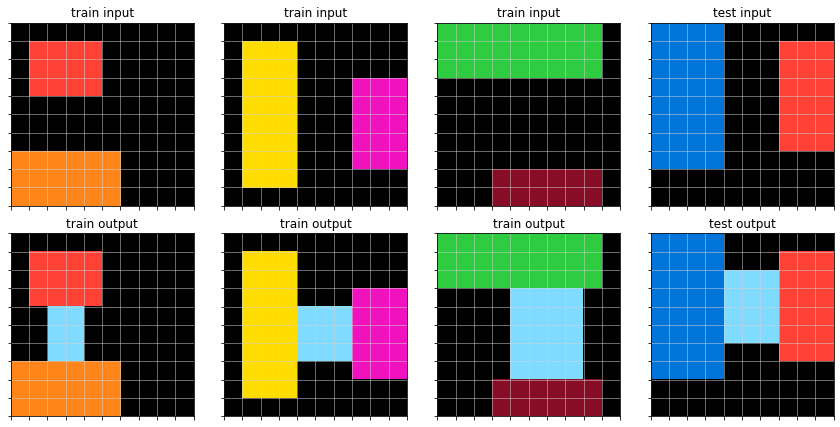

In [53]:
plot_task(get_data(np.random.choice(training_tasks)))

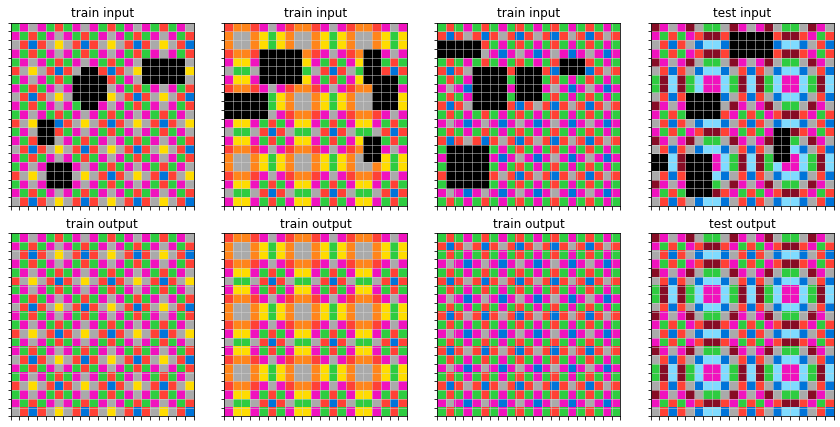

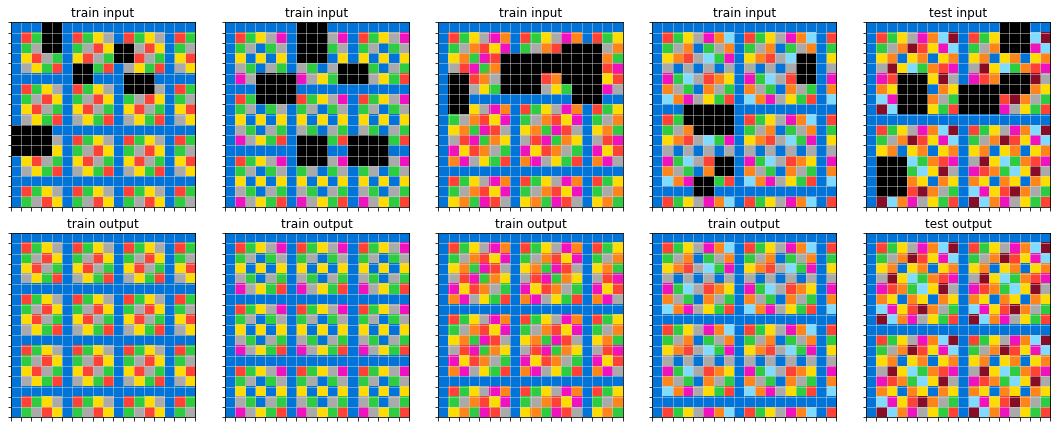

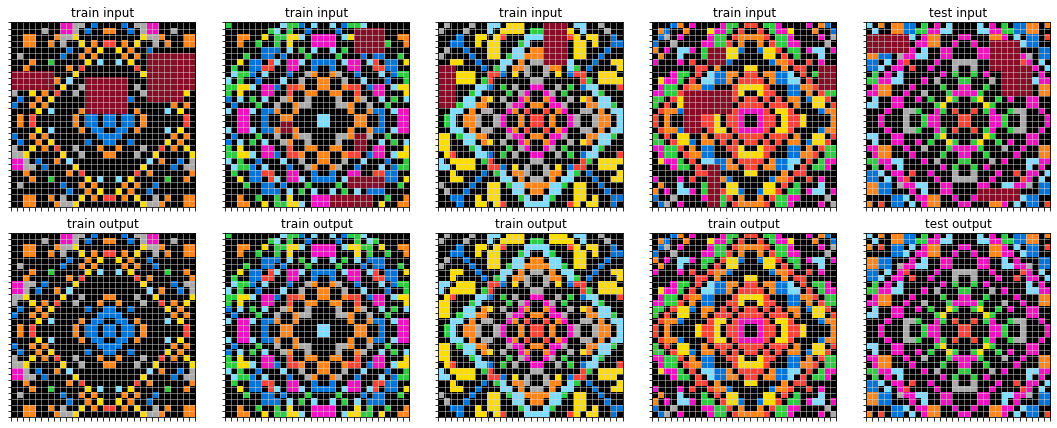

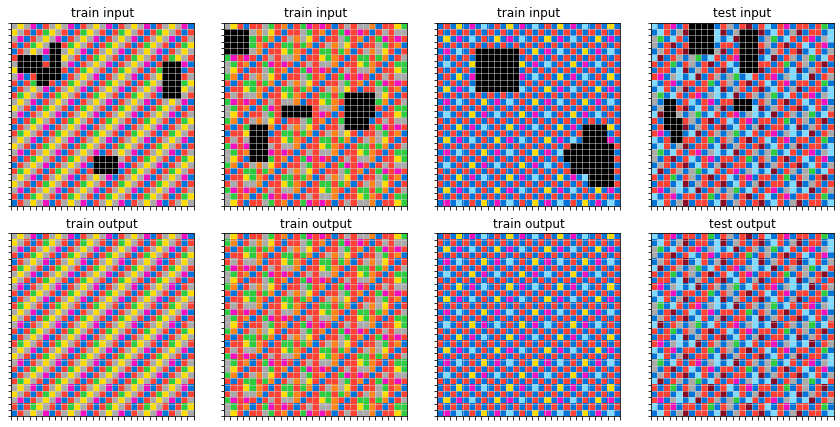

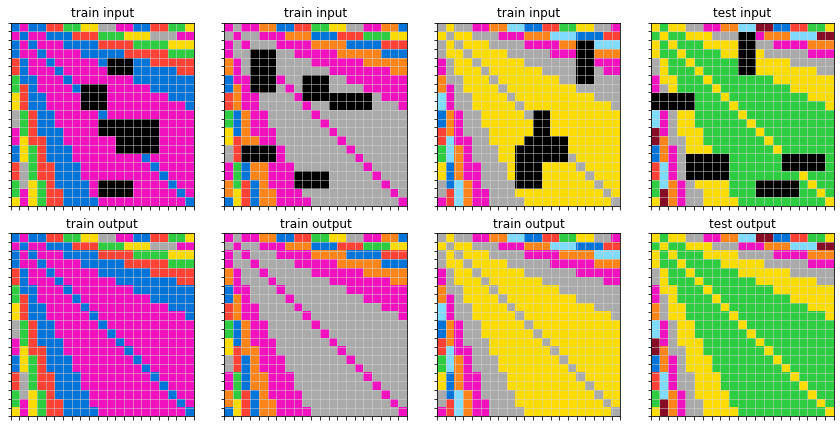

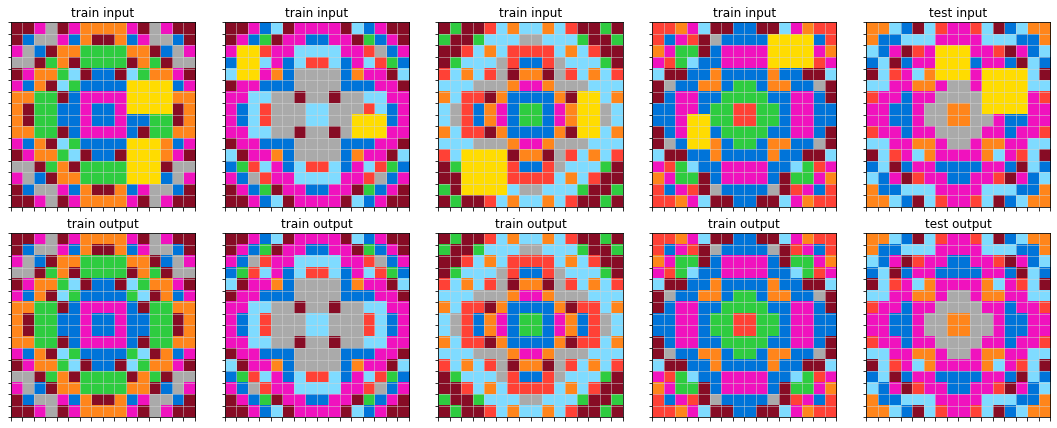

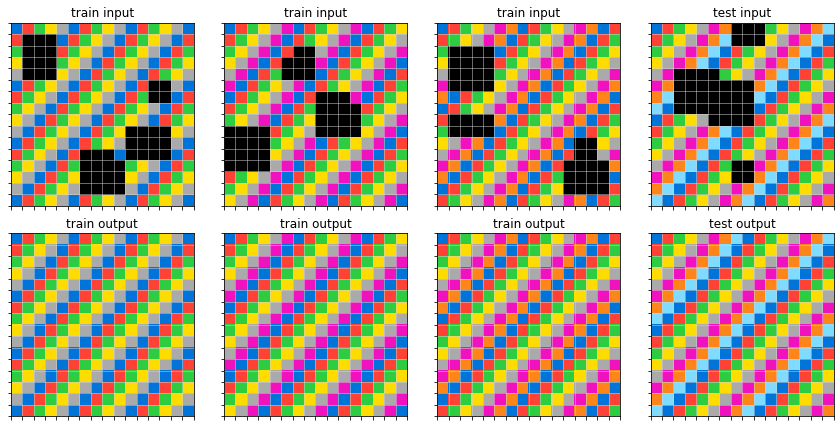

In [65]:
for t in [16, 60, 73, 109, 174, 286, 304]:
    task = get_data(str(training_path / training_tasks[t]))
    plot_task(task)

In [71]:
def check_symmetric(a):
    try:
        sym = 1
        if np.array_equal(a, a.T):
            sym *= 2 #Check main diagonal symmetric (top left to bottom right)
        if np.array_equal(a, np.flip(a).T):
            sym *= 3 #Check antidiagonal symmetric (top right to bottom left)
        if np.array_equal(a, np.flipud(a)):
            sym *= 5 # Check horizontal symmetric of array
        if np.array_equal(a, np.fliplr(a)):
            sym *= 7 # Check vertical symmetric of array
        return sym
    except:
        return 0

In [68]:
task = get_data(str(training_path / training_tasks[16]))

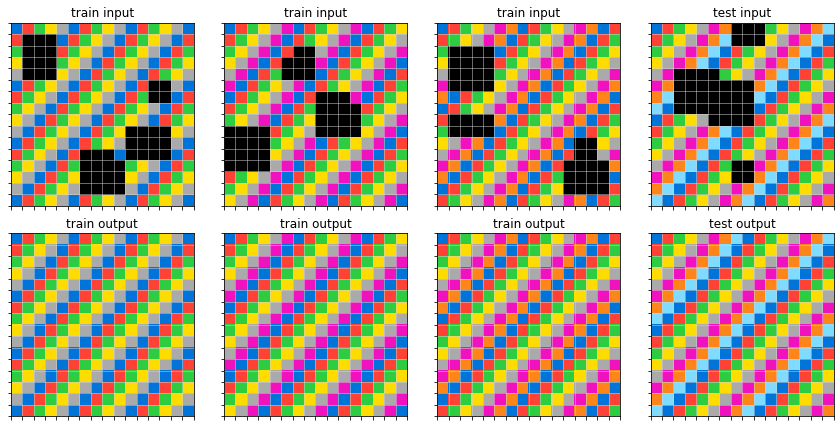

In [66]:
plot_task(task)

In [ ]:
def patch_pattern(grid,col,symmetries):
    x,y = grid.shape
    if 'diag' in symmetries:
        gridT = grid.T
        

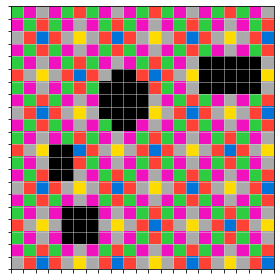

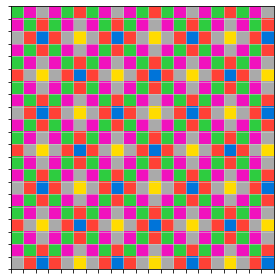

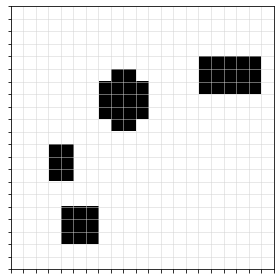

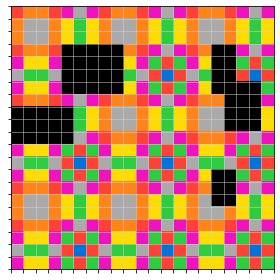

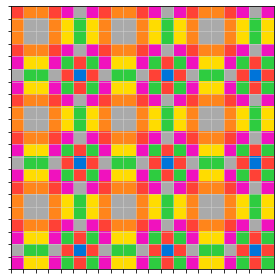

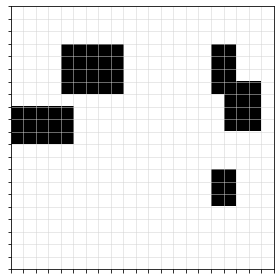

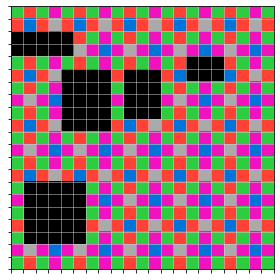

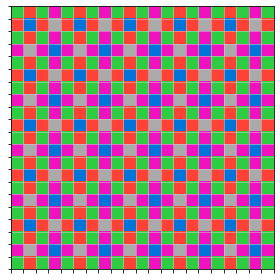

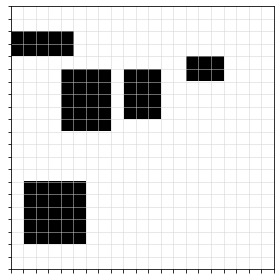

In [84]:
train_examples = task['train']
num_examples = len(train_examples)
for example in range(num_examples):
    input_grid = np.array(train_examples[example]['input'])
    output_grid = np.array(train_examples[example]['output'])
    
    plot_grid(input_grid)
    plot_grid(output_grid)
    
    diff_grid = np.where(output_grid - input_grid > 0, input_grid, np.full(diff_grid.shape,-1))
    
    plot_grid(diff_grid)